#### Pridicting Heart Disease by using Machine Learning Algorithm.

**About Dataset**

The dataset contains the following features:

- age(in years)
- sex: (1 = male; 0 = female)
- cp: chest pain type
- trestbps: resting blood pressure (in mm Hg on admission to the hospital)
- chol: serum cholestoral in mg/dl
- fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- restecg: resting electrocardiographic results
- thalach: maximum heart rate achieved
- exang: exercise induced angina (1 = yes; 0 = no)
- oldpeak: ST depression induced by exercise relative to rest
- slope: the slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: 1 or 0


Expected Outcome from the project

1. Statistical analysis of the data
2. Univariate and bivariate analysis 
3. Find the correlation
4. Use any two Machine Learning algorithm to perform same
**preferable ML models**
- Naive Bayes
- Dicision Tree
- Random forest
5. Use model evaluation matrices to discuss the accuracy
- Accuracy
- Confusion Matrix
- ROC Score
- Recall
- Precision
- F1 score


To download the dataset<a href="https://drive.google.com/file/d/1R5SjStkUsgTgyoAjC_14v13siYh8AAF3/view?usp=sharing" title="Google Drive"> Click here </a>

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import special
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_ind
import warnings
from sklearn.preprocessing import RobustScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectKBest, chi2,f_classif 
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.impute import KNNImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
# Suppress all warnings
warnings.filterwarnings("ignore")

### Data Loading

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Statistical analysis of the data

In [6]:
eda_df=df.copy()

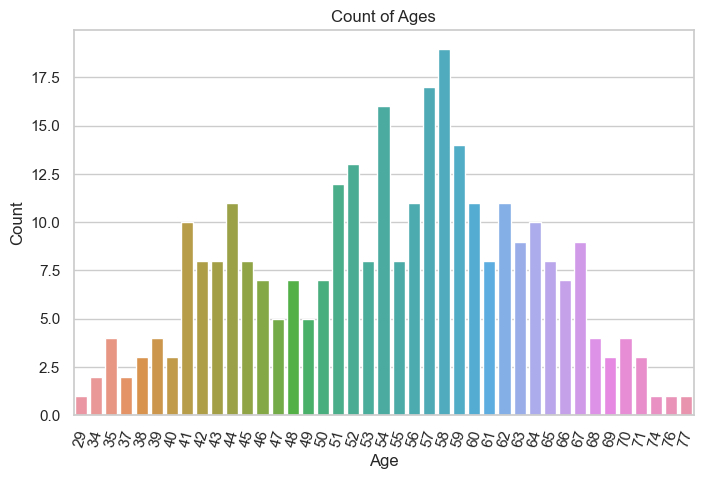

In [7]:
sns.set(style="whitegrid")  # Optional: Set the style

plt.figure(figsize=(8, 5))  # Set the figure size

# Creating the countplot for 'age' column
sns.countplot(x="age", data=eda_df)

plt.title('Count of Ages')  # Optional: Set the title
plt.xlabel('Age')  # Optional: Set the x-label
plt.ylabel('Count')  # Optional: Set the y-label

plt.xticks(rotation=75)

plt.show()  # Display the plot

In [8]:

bins = [20, 30, 40, 50, 60, 70, eda_df['age'].max() + 1]  # Adjust the upper bound
labels = ['20-30', '30-40', '40-50', '50-60', '60-70','70-80']

eda_df['Age group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [9]:
eda_df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target Age group  
0        0   0     1       1     60-70  
1        0   0     2       1     30-40  
2        2   0     2       1     40-50  
3        2   0     2       1     50-60  
4        2   0     2       1     50-60  
..     ...  ..   ...     ...       ...  
298      1   0     3       0     50-60  
299      1   0     3       0     40-50  
300      1   2     3       0     60-70  
301      1   1     3       0     50-60  
302      1   1     2       0     50-60  

[303 rows x 15 columns]

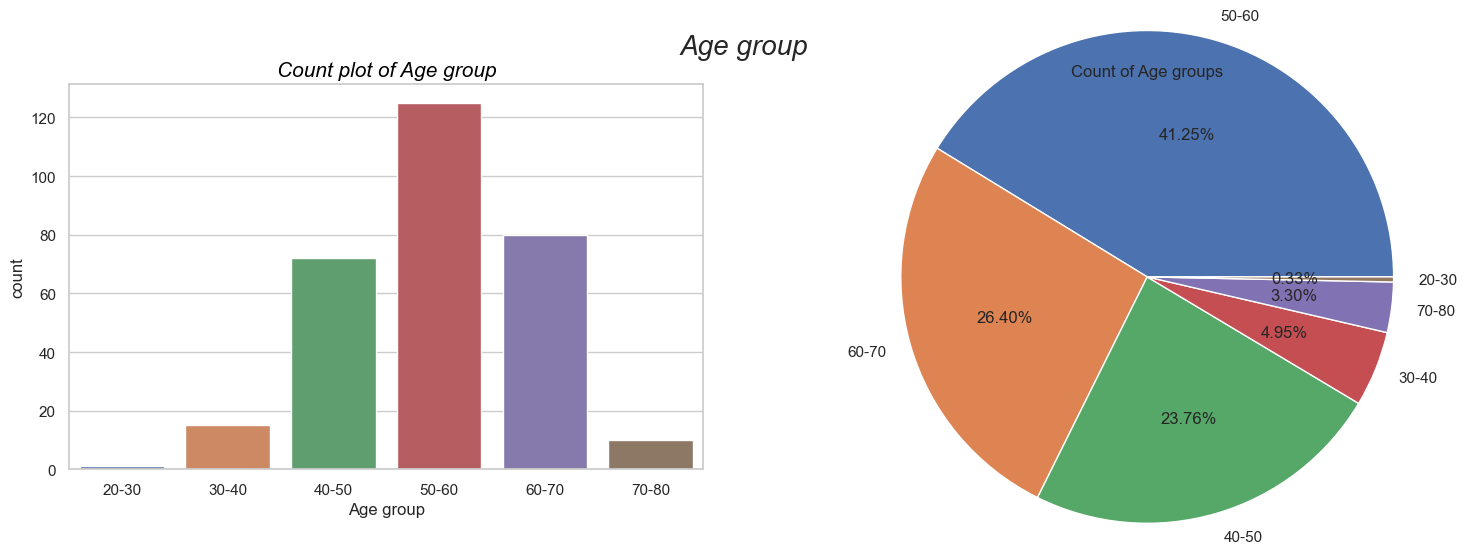

In [10]:
column = 'Age group'

# figsize is given along with the rows=1 and columns=3
fig,axes = plt.subplots(1,2,figsize=(18,5))
# super title is given with fontsize
fig.suptitle('Age group',fontsize=20,fontstyle='oblique')

# Countplot is plotted, axes[0] gives the sequential plot number, color is given from the colors list
sns.countplot(ax=axes[0],x=column,data=eda_df)
# Title name is formatted with custom fontsize
axes[0].set_title('Count plot of {}'.format(column),fontstyle='italic',fontsize=15,color='black')

# pie plot in second plot of defined subplots
axes[1] = plt.pie(eda_df[column].value_counts().values,labels=eda_df[column].value_counts().index,radius=1.6,autopct='%1.2f%%')
plt.title('Count of {}s'.format(column))
plt.show()

In [11]:
eda_df.groupby('Age group')['age'].count()

Age group
20-30      1
30-40     15
40-50     72
50-60    125
60-70     80
70-80     10
Name: age, dtype: int64

In [12]:
eda_df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

In [13]:
eda_df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

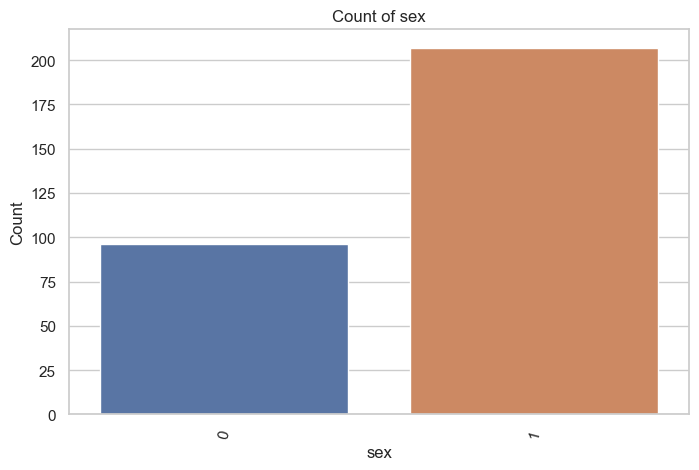

In [14]:
sns.set(style="whitegrid")  # Optional: Set the style

plt.figure(figsize=(8, 5))  # Set the figure size

# Creating the countplot for 'age' column
sns.countplot(x="sex", data=eda_df)

plt.title('Count of sex')  # Optional: Set the title
plt.xlabel('sex')  # Optional: Set the x-label
plt.ylabel('Count')  # Optional: Set the y-label

plt.xticks(rotation=75)

plt.show()  # Display the plot

In [15]:
age_sex_counts = eda_df.groupby(['age', 'sex']).size().reset_index(name='count')
print(age_sex_counts)

    age  sex  count
0    29    1      1
1    34    0      1
2    34    1      1
3    35    0      1
4    35    1      3
..  ...  ...    ...
68   70    1      4
69   71    0      3
70   74    0      1
71   76    0      1
72   77    1      1

[73 rows x 3 columns]


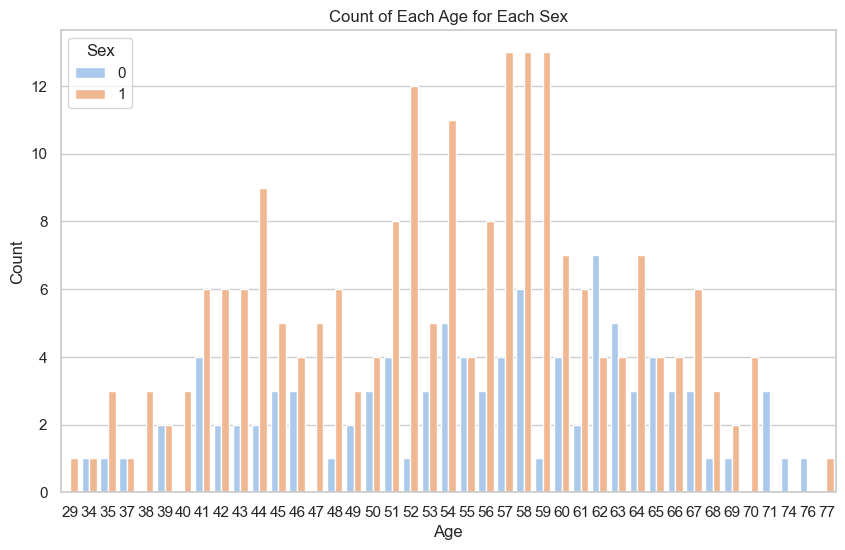

In [16]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='count', hue='sex', data=age_sex_counts, palette='pastel')
plt.title('Count of Each Age for Each Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()

In [17]:
eda_df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

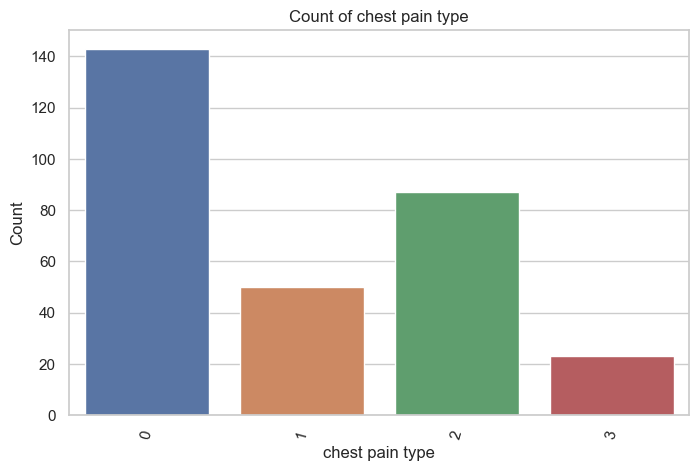

In [18]:
sns.set(style="whitegrid")  # Optional: Set the style

plt.figure(figsize=(8, 5))  # Set the figure size

# Creating the countplot for 'age' column
sns.countplot(x="cp", data=eda_df)

plt.title('Count of chest pain type')  # Optional: Set the title
plt.xlabel('chest pain type')  # Optional: Set the x-label
plt.ylabel('Count')  # Optional: Set the y-label

plt.xticks(rotation=75)

plt.show()  # Display the plot

In [19]:
age_cp_counts = eda_df.groupby(['age', 'cp']).size().reset_index(name='count')
print(age_cp_counts)

     age  cp  count
0     29   1      1
1     34   1      1
2     34   3      1
3     35   0      3
4     35   1      1
..   ...  ..    ...
103   71   1      1
104   71   2      1
105   74   1      1
106   76   2      1
107   77   0      1

[108 rows x 3 columns]


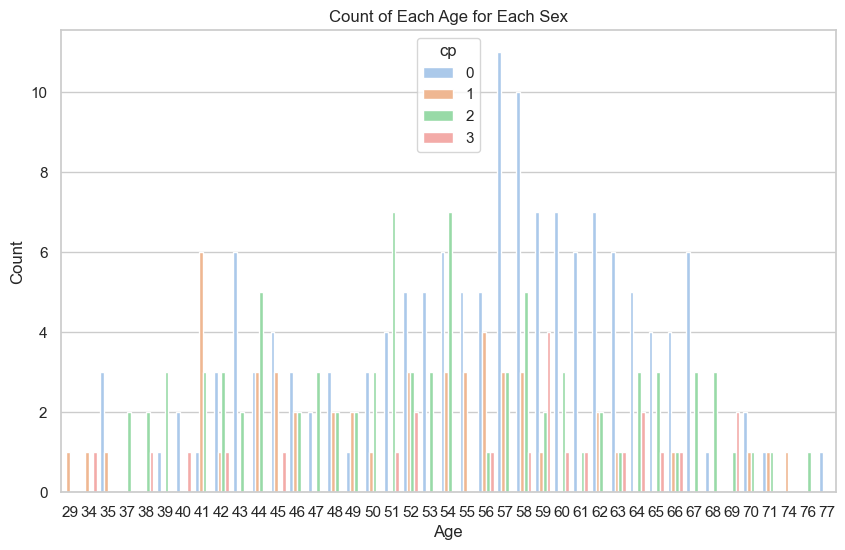

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='age', y='count', hue='cp', data=age_cp_counts, palette='pastel')
plt.title('Count of Each Age for Each Sex')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='cp')
plt.show()

In [21]:
sex_cp_counts = eda_df.groupby(['sex', 'cp']).size().reset_index(name='count')
print(sex_cp_counts)

   sex  cp  count
0    0   0     39
1    0   1     18
2    0   2     35
3    0   3      4
4    1   0    104
5    1   1     32
6    1   2     52
7    1   3     19


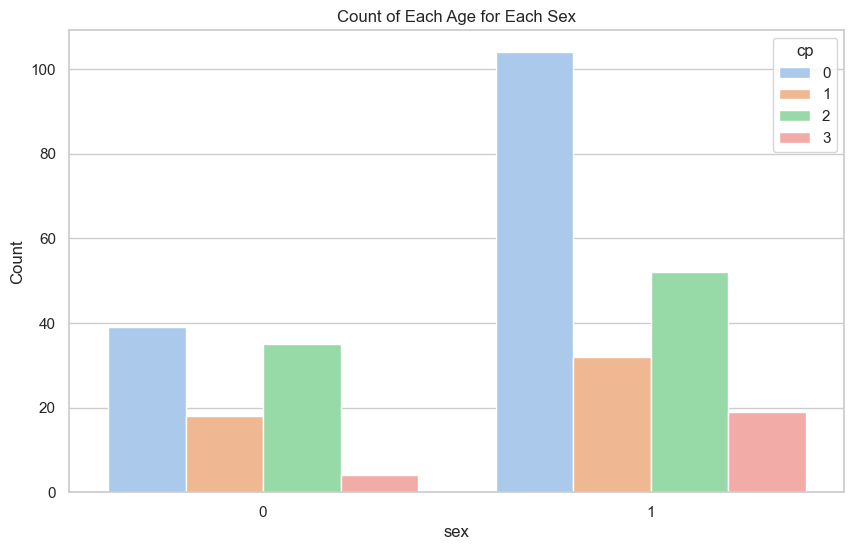

In [22]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='count', hue='cp', data=sex_cp_counts, palette='pastel')
plt.title('Count of Each Age for Each Sex')
plt.xlabel('sex')
plt.ylabel('Count')
plt.legend(title='cp')
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [24]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### univariant analysis

Summary for age:
count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64


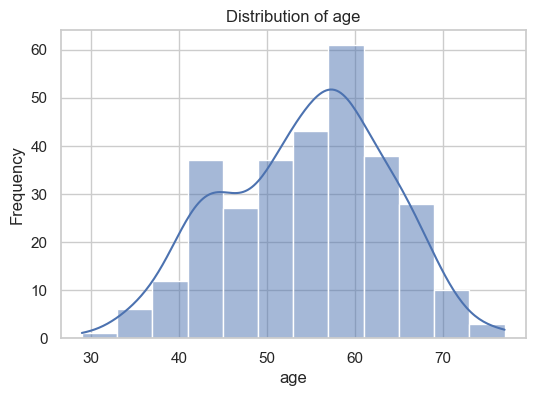

Summary for sex:
count    303.000000
mean       0.683168
std        0.466011
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64


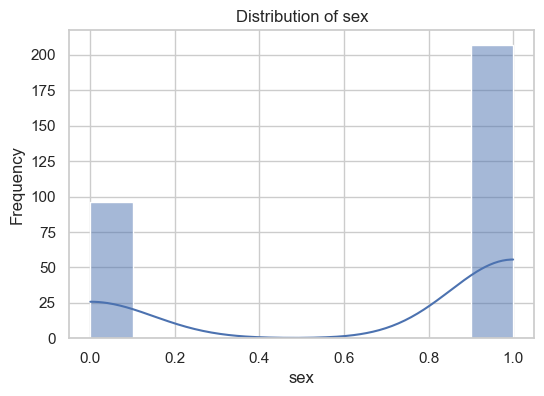

Summary for cp:
count    303.000000
mean       0.966997
std        1.032052
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: cp, dtype: float64


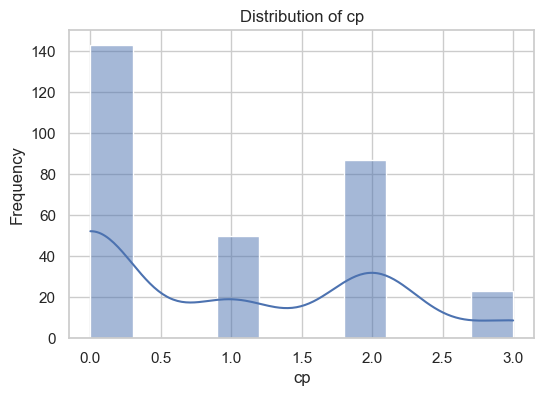

Summary for trestbps:
count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64


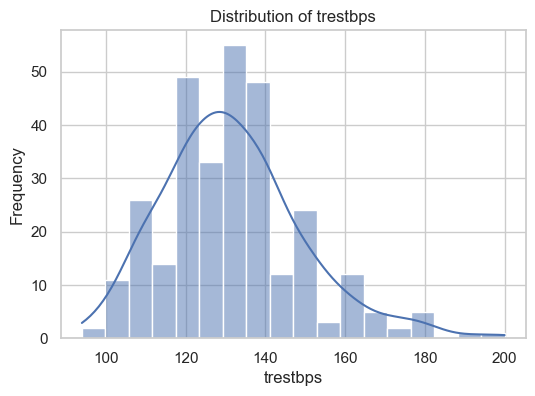

Summary for chol:
count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64


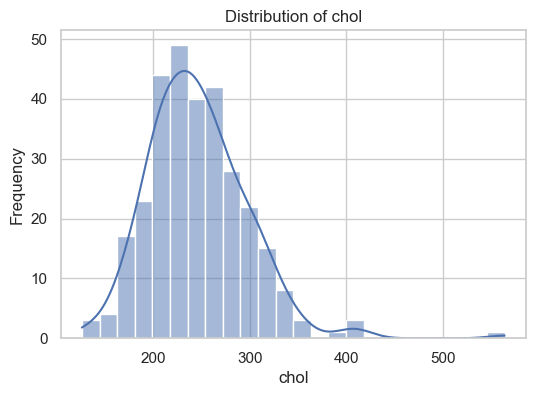

Summary for fbs:
count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64


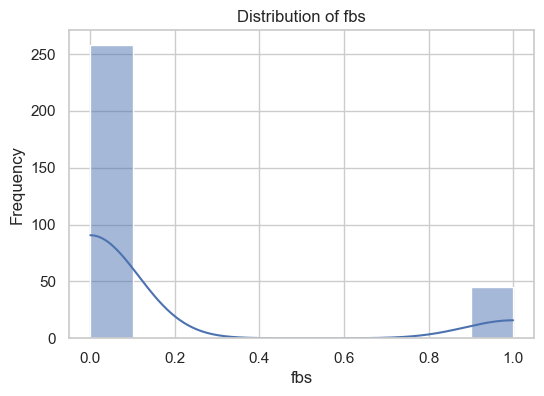

Summary for restecg:
count    303.000000
mean       0.528053
std        0.525860
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        2.000000
Name: restecg, dtype: float64


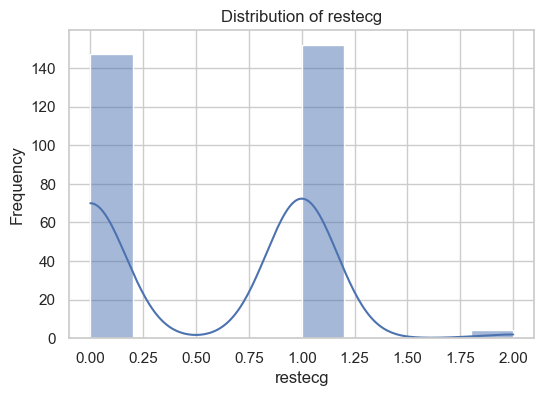

Summary for thalach:
count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: thalach, dtype: float64


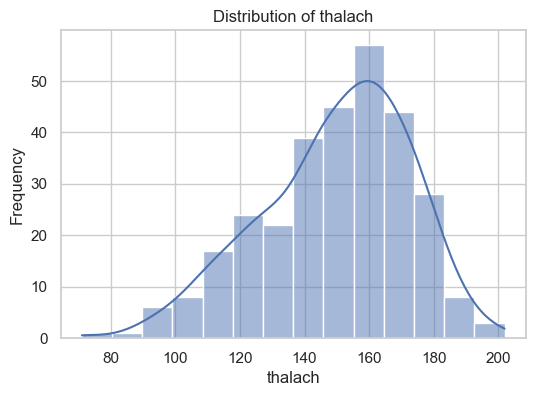

Summary for exang:
count    303.000000
mean       0.326733
std        0.469794
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: exang, dtype: float64


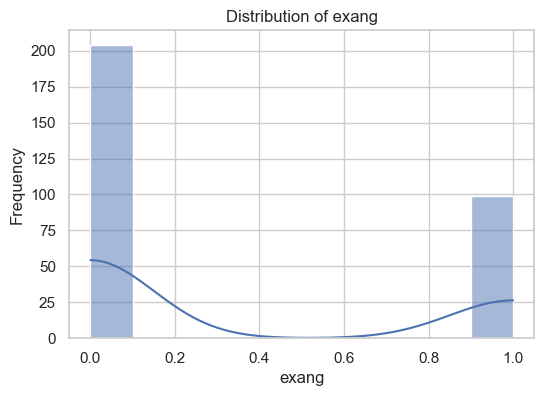

Summary for oldpeak:
count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64


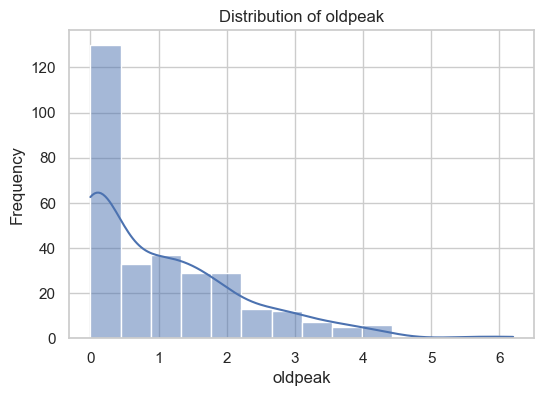

Summary for slope:
count    303.000000
mean       1.399340
std        0.616226
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: slope, dtype: float64


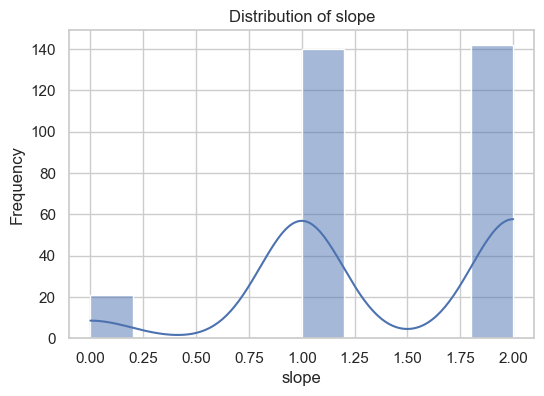

Summary for ca:
count    303.000000
mean       0.729373
std        1.022606
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: ca, dtype: float64


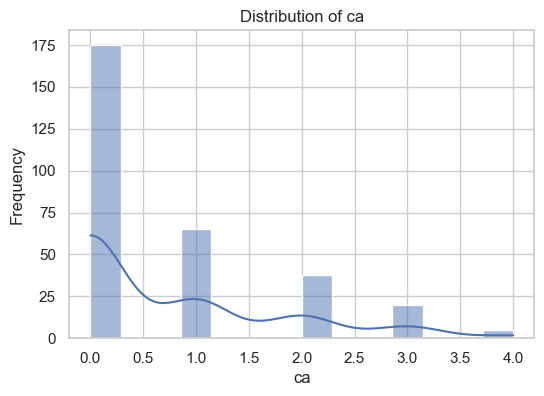

Summary for thal:
count    303.000000
mean       2.313531
std        0.612277
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        3.000000
Name: thal, dtype: float64


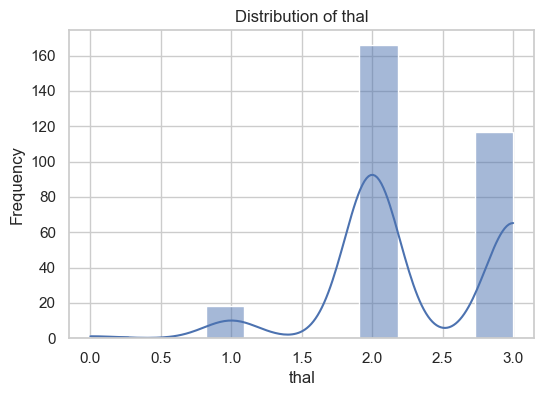

Summary for target:
count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64


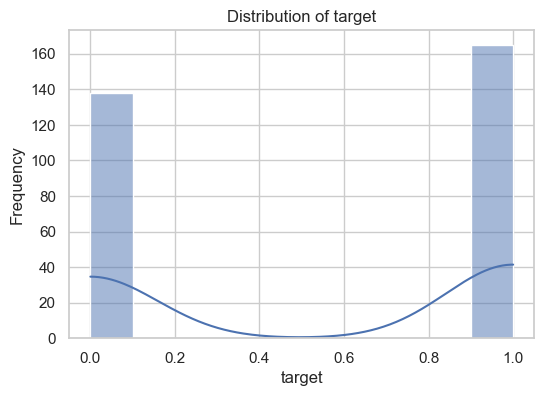

In [25]:
for column in eda_df.columns:
    if eda_df[column].dtype in [int, float]:  # Numeric columns
        print(f"Summary for {column}:")
        print(eda_df[column].describe())
        plt.figure(figsize=(6, 4))
        sns.histplot(eda_df[column], kde=True)
        plt.title(f"Distribution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

### bi variant analysis with respect to target

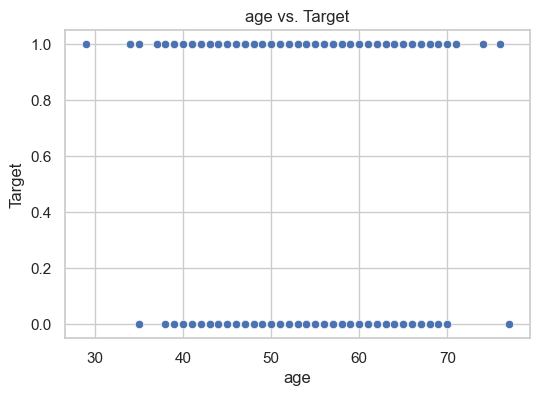

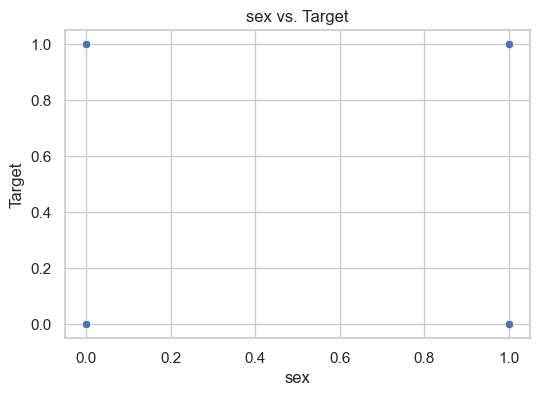

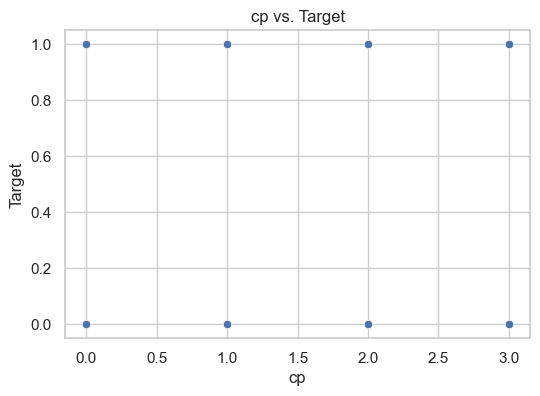

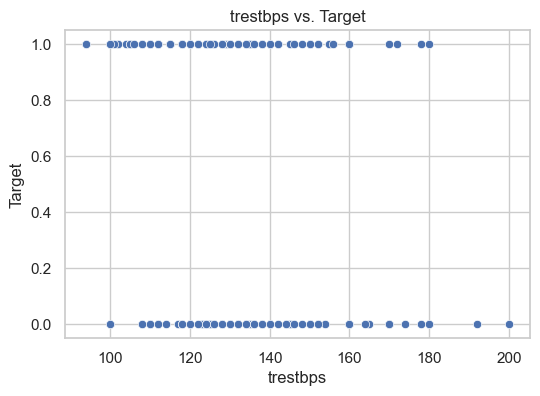

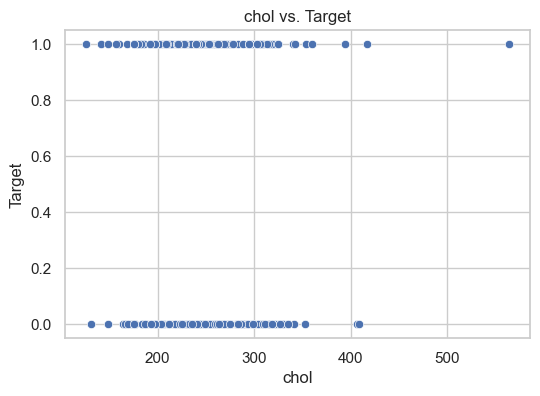

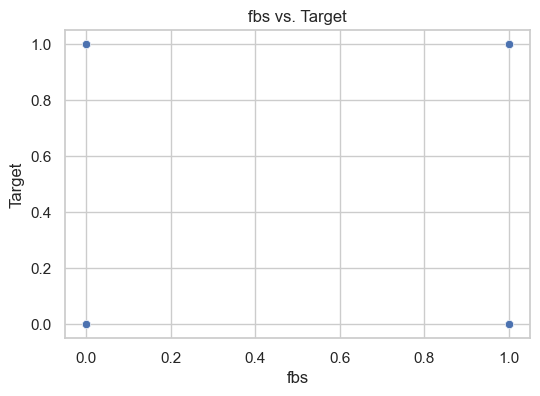

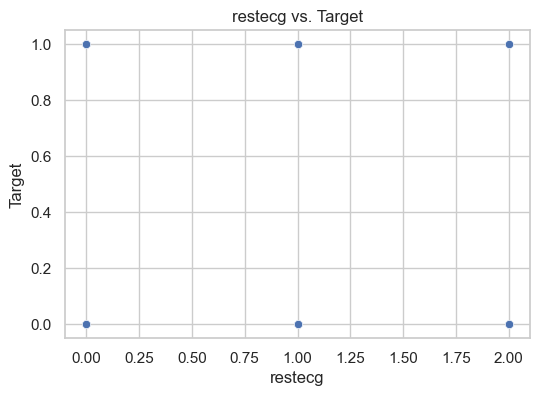

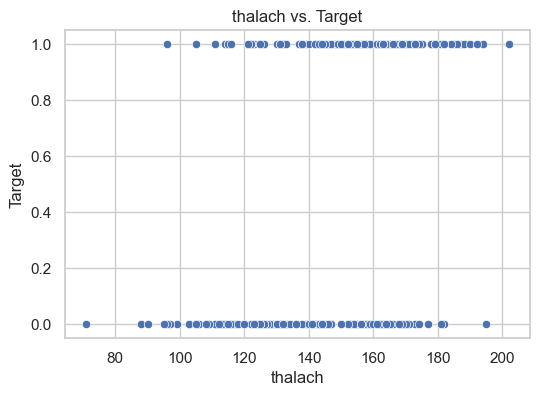

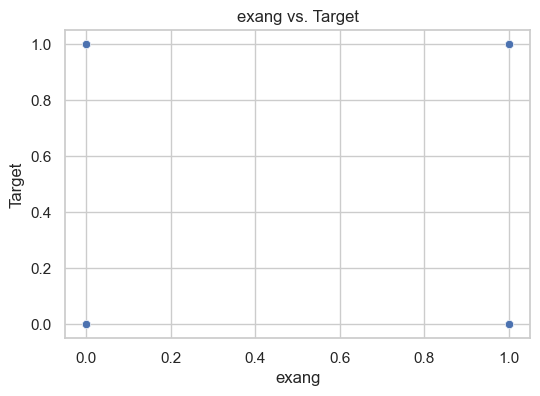

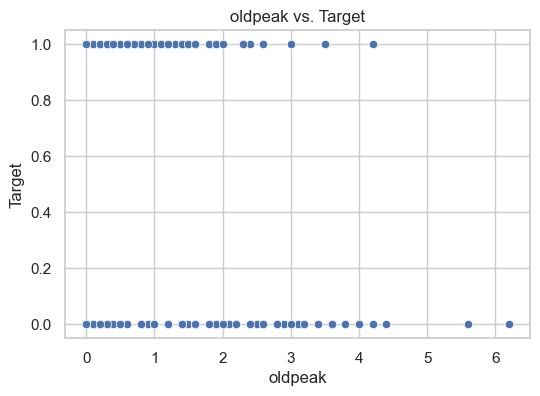

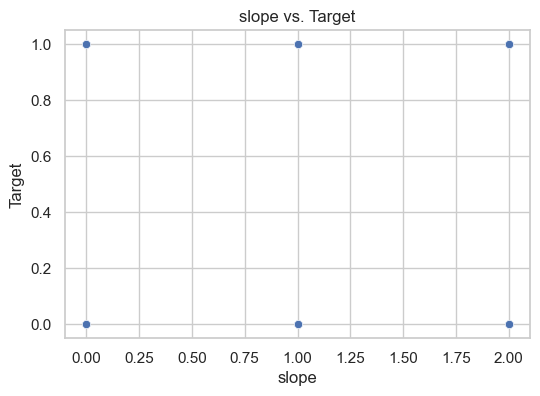

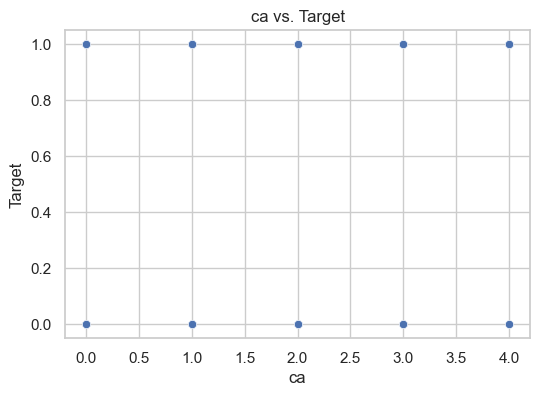

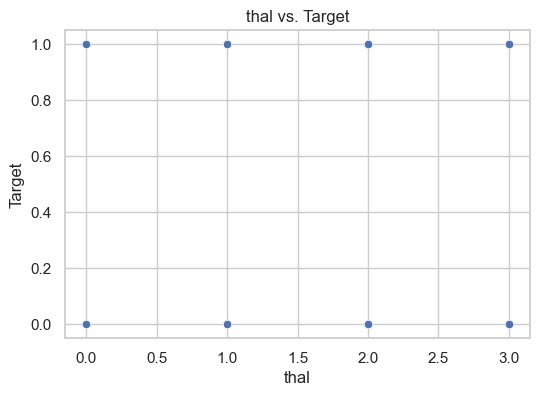

In [26]:
numeric_columns = eda_df.select_dtypes(include=['int', 'float']).columns

for column in numeric_columns:
    if column != 'target':  # Exclude target variable
        plt.figure(figsize=(6, 4))
        sns.scatterplot(x=column, y='target', data=eda_df)
        plt.title(f"{column} vs. Target")
        plt.xlabel(column)
        plt.ylabel("Target")
        plt.show()

In [27]:
df.corr()

age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
target   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg   thalach     exang   oldpeak     slope        ca  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trestbps -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalach   0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exang    -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slope     0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
ca       -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thal     -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
target    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

              thal    target  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trestbps  0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalach  -0.096439  0.421741  
exang     0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slope    -0.104764  0.345877  
ca        0.151832 -0.391724  
thal      1.000000 -0.344029  
target   -0.344029  1.000000

In [28]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')

# Set the title
plt.title("Correlation Heatmap (viridis)")

# Show the plot
plt.show()

### scaling and removing outlier df data 

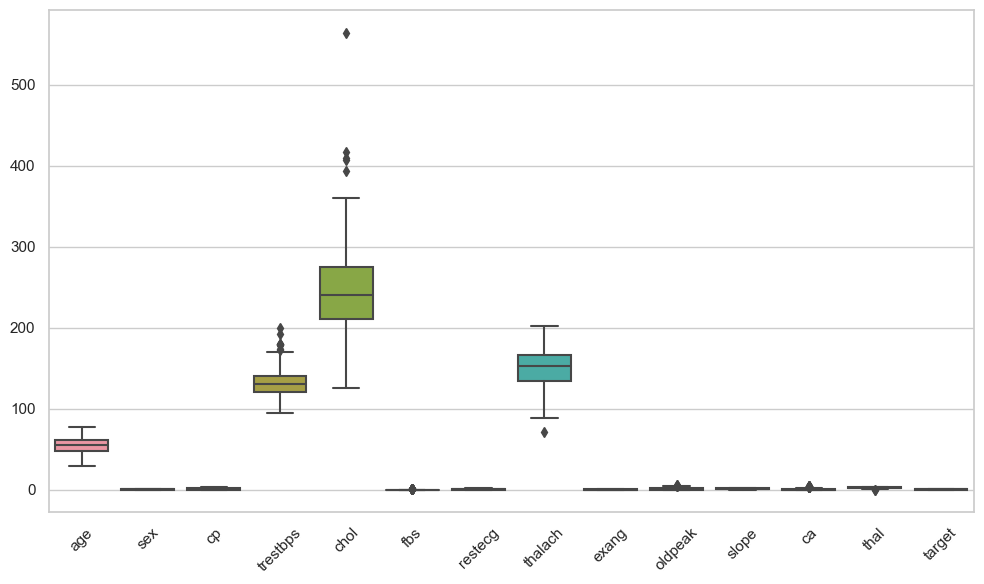

age       sex        cp  trestbps      chol       fbs   restecg  \
0    0.952197  0.681005  1.973123  0.763956 -0.256334  2.394438 -1.005832   
1   -1.915313  0.681005  1.002577 -0.092738  0.072199 -0.417635  0.898962   
2   -1.474158 -1.468418  0.032031 -0.092738 -0.816773 -0.417635 -1.005832   
3    0.180175  0.681005  0.032031 -0.663867 -0.198357 -0.417635  0.898962   
4    0.290464 -1.468418 -0.938515 -0.663867  2.082050 -0.417635  0.898962   
..        ...       ...       ...       ...       ...       ...       ...   
298  0.290464 -1.468418 -0.938515  0.478391 -0.101730 -0.417635  0.898962   
299 -1.033002  0.681005  1.973123 -1.234996  0.342756 -0.417635  0.898962   
300  1.503641  0.681005 -0.938515  0.706843 -1.029353  2.394438  0.898962   
301  0.290464  0.681005 -0.938515 -0.092738 -2.227533 -0.417635  0.898962   
302  0.290464 -1.468418  0.032031 -0.092738 -0.198357 -0.417635 -1.005832   

      thalach     exang   oldpeak     slope        ca      thal  target  
0    0.015443 -0.696631  1.087338 -2.274579 -0.714429 -2.148873       1  
1    1.633471 -0.696631  2.122573 -2.274579 -0.714429 -0.512922       1  
2    0.977514 -0.696631  0.310912  0.976352 -0.714429 -0.512922       1  
3    1.239897 -0.696631 -0.206705  0.976352 -0.714429 -0.512922       1  
4    0.583939  1.435481 -0.379244  0.976352 -0.714429 -0.512922       1  
..        ...       ...       ...       ...       ...       ...     ...  
298 -1.165281  1.435481 -0.724323 -0.649113 -0.714429  1.123029       0  
299 -0.771706 -0.696631  0.138373 -0.649113 -0.714429  1.123029       0  
300 -0.378132 -0.696631  2.036303 -0.649113  1.244593  1.123029       0  
301 -1.515125  1.435481  0.138373 -0.649113  0.265082  1.123029       0  
302  1.064975 -0.696631 -0.896862 -0.649113  0.265082 -0.512922       0  

[303 rows x 14 columns]

In [29]:
# Creating box plots to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Assuming 'df' is your DataFrame
scaler = StandardScaler()

# Separating features (X) and target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Standardizing the features
X_standardized = scaler.fit_transform(X)

# Creating a new DataFrame with standardized features
columns = X.columns  
standardized_df = pd.DataFrame(X_standardized, columns=columns)

# Adding the target_class back to the standardized DataFrame
standardized_df['target'] = y

# Displaying the resulting DataFrame with standardized features
standardized_df

In [30]:
standardized_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [31]:
# Extract columns except the target variable (assuming 'target_class' is the target column)
features = standardized_df.drop('target', axis=1)

# Calculate Q1 and Q3 for the features
Q1 = features.quantile(0.25)
Q3 = features.quantile(0.75)

# Calculate IQR for the features
IQR = Q3 - Q1

# Define a threshold to detect outliers (e.g., 1.5 times the IQR)
threshold = 1.5

# Find outliers for the features
lower_bound = Q1 - threshold * IQR
upper_bound = Q3 + threshold * IQR

# Identify rows without outliers for the features
no_outliers = ((features >= lower_bound) & (features <= upper_bound)).all(axis=1)

# Filter the DataFrame to remove outliers for the features
standardized_df = standardized_df[no_outliers]

In [32]:
standardized_df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [33]:
standardized_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 1 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       227 non-null    float64
 1   sex       227 non-null    float64
 2   cp        227 non-null    float64
 3   trestbps  227 non-null    float64
 4   chol      227 non-null    float64
 5   fbs       227 non-null    float64
 6   restecg   227 non-null    float64
 7   thalach   227 non-null    float64
 8   exang     227 non-null    float64
 9   oldpeak   227 non-null    float64
 10  slope     227 non-null    float64
 11  ca        227 non-null    float64
 12  thal      227 non-null    float64
 13  target    227 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 26.6 KB


In [34]:
# Separating features (X) and target variable (y)
X = standardized_df.drop('target', axis=1)
y = standardized_df['target']

### Navie bayes

In [45]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the model
naive_bayes.fit(X_train, y_train)

# Predict on the test set
y_pred = naive_bayes.predict(X_test)


# Evaluation metrics on the original test set
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix on the original test set
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

# Calculate ROC AUC score
roc_score = roc_auc_score(y_test, naive_bayes.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_score)

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.97      0.90      0.93        31

    accuracy                           0.91        46
   macro avg       0.89      0.92      0.90        46
weighted avg       0.92      0.91      0.91        46

Accuracy: 0.9130434782608695
Confusion Matrix:
 [[14  1]
 [ 3 28]]
ROC AUC Score: 0.9634408602150538


### RandomForest

In [42]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)


# Evaluation metrics on the original test set
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix on the original test set
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

# Calculate ROC AUC score
roc_score = roc_auc_score(y_test, random_forest.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_score)

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       0.97      0.94      0.95        31

    accuracy                           0.93        46
   macro avg       0.92      0.93      0.93        46
weighted avg       0.94      0.93      0.94        46

Accuracy: 0.9347826086956522
Confusion Matrix:
 [[14  1]
 [ 2 29]]
ROC AUC Score: 0.9860215053763441


### Decision Tree

In [41]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the model
decision_tree.fit(X_train, y_train)

# Predict on the test set
y_pred = decision_tree.predict(X_test)


# Evaluation metrics on the original test set
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion matrix on the original test set
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion)

# Calculate ROC AUC score
roc_score = roc_auc_score(y_test, decision_tree.predict_proba(X_test)[:, 1])
print("ROC AUC Score:", roc_score)

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79        15
           1       0.93      0.84      0.88        31

    accuracy                           0.85        46
   macro avg       0.83      0.85      0.83        46
weighted avg       0.86      0.85      0.85        46

Accuracy: 0.8478260869565217
Confusion Matrix:
 [[13  2]
 [ 5 26]]
ROC AUC Score: 0.8526881720430108


### Testing the each model

In [38]:
input_data = np.array([[-0.666221722,0.6508804192761096,0.026911478574701327,-1.300777363,-0.293118583,-0.400802408,0.899520384,0.8012414577346247,-0.683377697,-0.005514042,-2.309401077,-0.711533348,1.1468743517954596]])

print("navie bayes predection::",naive_bayes.predict(input_data))
print("Random forest predection::",random_forest.predict(input_data))
print("Decision tree predection::",decision_tree.predict(input_data))

navie bayes predection:: [0]
Random forest predection:: [0]
Decision tree predection:: [0]


In [39]:
input_data = np.array([[0.5405696476961962, 0.6508804192761096, 0.9990886420857875, 1.301227536776079, -0.671791104, 2.4949949899749297, 0.899520384, 0.3252282650344993, -0.683377697, 0.525671992, 0.962250449, -0.711533348, -0.485867952]])

print("navie bayes predection::",naive_bayes.predict(input_data))
print("Random forest predection::",random_forest.predict(input_data))
print("Decision tree predection::",decision_tree.predict(input_data))

navie bayes predection:: [1]
Random forest predection:: [1]
Decision tree predection:: [1]


### conclusion

#### I have modeled it using 3 different ML algorithim ,from the report i can see navie bayes and random forest performed well both of its classification report ,confusion matrix and roc auc score are good and also the decision tree model also performed well but not good as other two models , so when data volume is less we can go with random forest considering time complexity if the data is huge then we can go with nave byes